# Production Plant Data for Condition Monitoring

- Dataset source:  
[https://www.kaggle.com/inIT-OWL/production-plant-data-for-condition-monitoring](https://www.kaggle.com/inIT-OWL/production-plant-data-for-condition-monitoring)
- Paper:  
[https://authors.elsevier.com/sd/article/S221282711830307X](https://authors.elsevier.com/sd/article/S221282711830307X)

## Content
- 8 run-to-failure experiments
- 8 features related to the component
- Training and prediction data were selected using the leave-one-out method

In [135]:
import os
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
sns.set(font_scale=1.2, style='whitegrid')

In [30]:
def load_data(fp, index=0):
    """ 0: C7
        1: C8
        2: C9
        3: C11
        4: C13
        5: C14
        6: C15
        7: C16

        Note that C7 and C13 included a short break
        (for about 100 timestamps long)
        between the two procedure.
    """
    if index == 0:
        df = pd.read_csv(fp + '/C7-1.csv.gz')
        df = pd.concat([df, pd.read_csv(fp + '/C7-2.csv.gz')])
        df = df.reset_index(drop=True)
        df.Timestamp = df.index.values
        return df
    elif index == 1:
        return pd.read_csv(fp + '/C8.csv.gz')
    elif index == 2:
        return pd.read_csv(fp + '/C9.csv.gz')
    elif index == 3:
        return pd.read_csv(fp + '/C11.csv.gz')
    elif index == 4:
        df = pd.read_csv(fp + '/C13-1.csv.gz')
        df = pd.concat([df, pd.read_csv(fp + '/C13-2.csv.gz')])
        df = df.reset_index(drop=True)
        df.Timestamp = df.index.values
        return df
    elif index == 5:
        return pd.read_csv(fp + '/C14.csv.gz')
    elif index == 6:
        return pd.read_csv(fp + '/C15.csv.gz')
    elif index == 7:
        return pd.read_csv(fp + '/C16.csv.gz')
    else:
        raise ValueError

In [109]:
def rename_components(df):
    """ current and speed
    """
    # Rename L
    L_curr = ['L_1', 'L_3', 'L_4', 'L_7', 'L_9']
    L_speed = ['L_2', 'L_6', 'L_5', 'L_8', 'L_10']
    df = df.rename(columns={k: f'c{i}_curr' for i, k in enumerate(L_curr)})
    df = df.rename(columns={k: f'c{i}_speed' for i, k in enumerate(L_speed)})

    # Rename A, B, and C
    df = df.rename(columns={f'A_{i}': f'c5_val{i}' for i in range(1, 6)})
    df = df.rename(columns={f'B_{i}': f'c6_val{i}' for i in range(1, 6)})
    df = df.rename(columns={f'C_{i}': f'c7_val{i}' for i in range(1, 6)})

    return df

In [110]:
# df = load_data('../datasets/ppd/', index=0)
# df = load_data('../datasets/ppd/', index=1)
# df = load_data('../datasets/ppd/', index=2)
df = load_data('../datasets/ppd/', index=3)
# df = load_data('../datasets/ppd/', index=4)
# df = load_data('../datasets/ppd/', index=5)
# df = load_data('../datasets/ppd/', index=6)
# df = load_data('../datasets/ppd/', index=7)
df

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,-45.568737,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,-51.259983,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,-56.656587,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,-52.903776,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,-56.377452,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18424,18424,-99.331815,-79.731577,-12.493330,-24.880351,-22.421616,-24.852459,-22.271157,-24.896782,-49.368070,...,-97.629294,-74.103198,-83.669980,-97.090702,-31.844985,-97.600790,-62.214728,-100.0,-100.0,-100.0
18425,18425,-99.331815,-79.731577,-12.417105,-24.749230,-22.353897,-24.852459,-22.311810,-24.857461,-44.250601,...,-97.629294,-74.103198,-83.669980,-91.001141,-21.215398,-97.600790,-64.379264,-100.0,-100.0,-100.0
18426,18426,-99.331815,-79.731577,-12.737251,-24.880351,-22.326810,-24.747541,-22.284708,-24.791926,-49.259518,...,-97.629294,-74.103198,-83.669980,-97.304621,-26.628042,-97.600790,-65.445847,-100.0,-100.0,-100.0
18427,18427,-99.331815,-79.731577,-12.630536,-24.801678,-22.286179,-24.839344,-22.284708,-24.883675,-43.304644,...,-97.629294,-74.103198,-83.669980,-93.525385,-33.477533,-97.600790,-62.983295,-100.0,-100.0,-100.0


In [111]:
for i in range(8):
    df = load_data('../datasets/ppd/', index=i)
    print(df.shape)

(51671, 26)
(15803, 26)
(34245, 26)
(18429, 26)
(23670, 26)
(32848, 26)
(30737, 26)
(21021, 26)


In [112]:
df = load_data('../datasets/ppd')
df = rename_components(df)
df.nunique()

Timestamp    51671
c0_curr        621
c0_speed      5970
c5_val1        228
c5_val2        298
c6_val1        226
c6_val2        289
c7_val1        225
c7_val2        345
c5_val3       3571
c5_val4       3383
c6_val3       2432
c6_val4       3510
c7_val3       3345
c7_val4       3797
c1_curr       1376
c2_curr       2695
c2_speed      2687
c1_speed      2824
c3_curr       6623
c3_speed      6693
c4_curr       2786
c4_speed      3815
c5_val5         73
c6_val5         75
c7_val5         61
dtype: int64

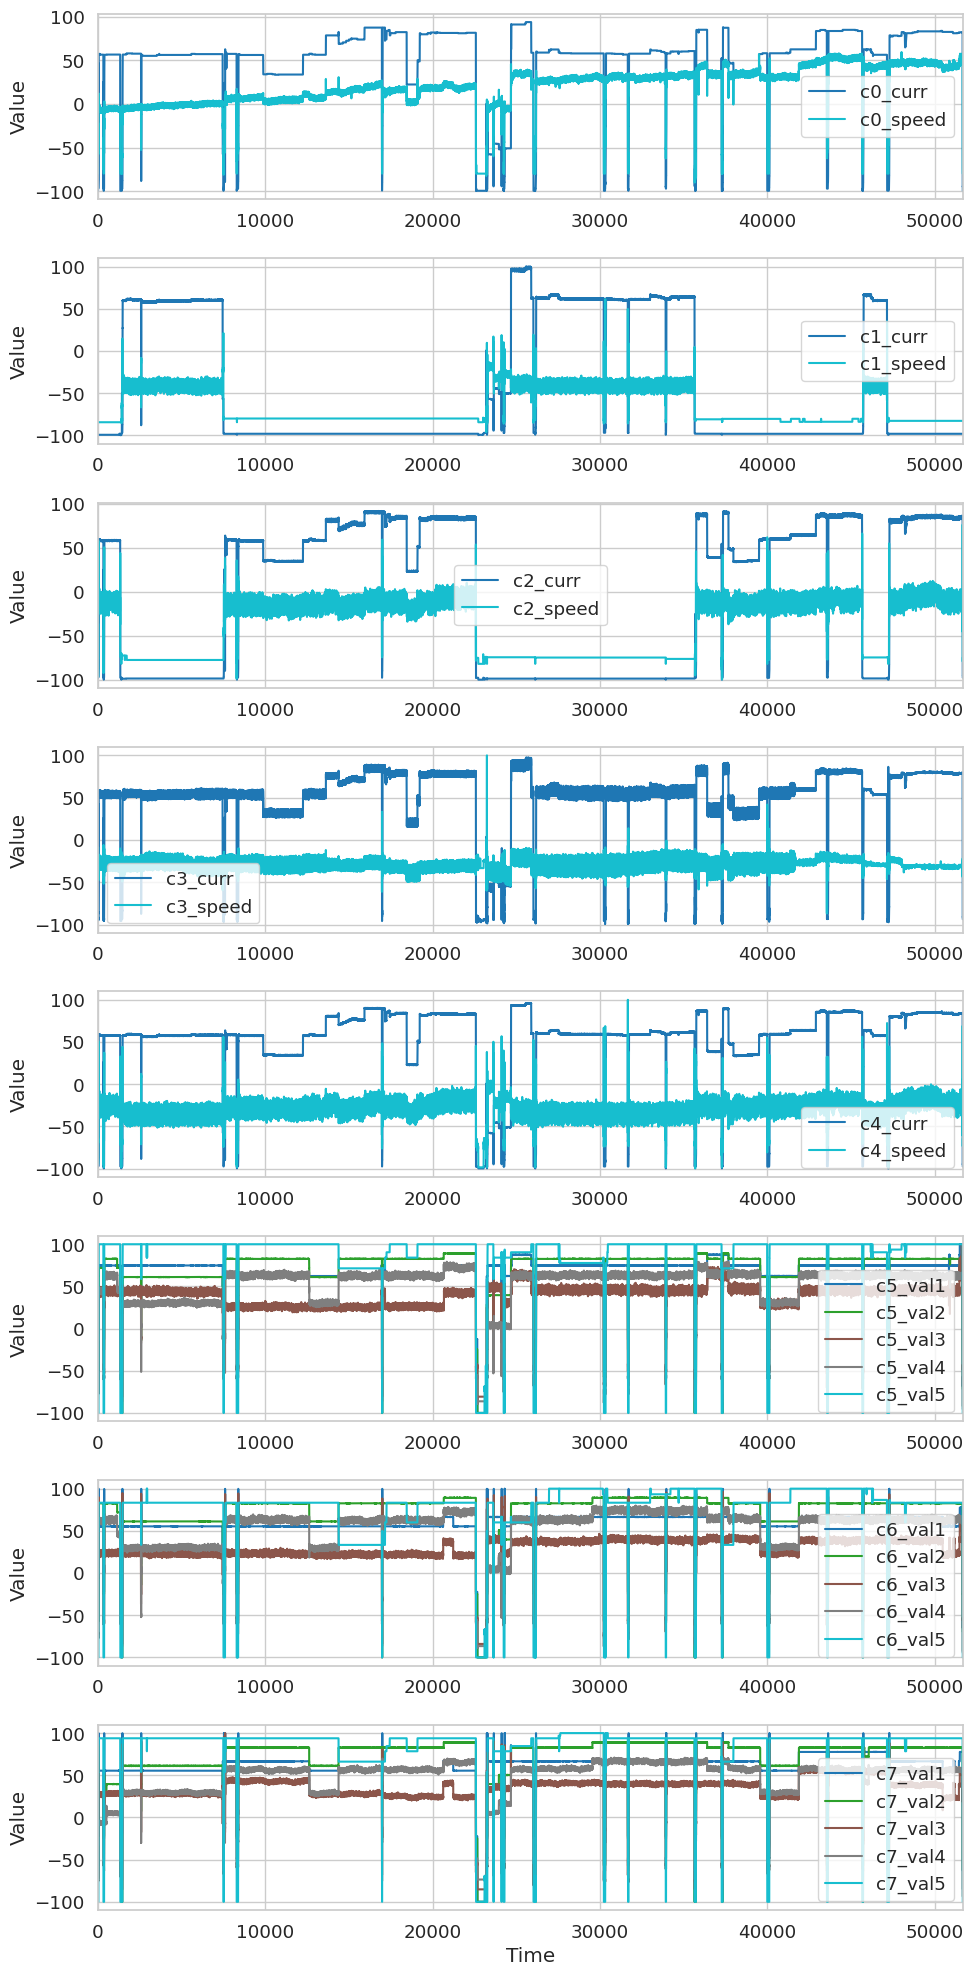

In [130]:
fig, ax = plt.subplots(8, figsize=(10, 20))

for i in range(8):
    df.loc[:, df.columns.str.contains(f'c{i}')].plot(
        ax=ax[i], legend=True, cmap='tab10')
    ax[i].set_ylabel("Value")
    ax[i].set_xlim(0, df.shape[0])

ax[-1].set_xlabel('Time')
fig.tight_layout()
plt.show()

In [139]:
def gen_summary(fp, outdir='../out'):

    if outdir is None:
        outdir = os.path.dirname(__file__)

    os.makedirs(outdir, exist_ok=True)
    sns.set(font_scale=1.1, style='whitegrid')

    with PdfPages(outdir + '/ppd_summary.pdf') as pp:
        for i in tqdm.trange(8):
            df = load_data(fp, index=i)
            df = rename_components(df)
            fig, ax = plt.subplots(8, figsize=(20, 20))

            for i in range(8):
                df.loc[:, df.columns.str.contains(f'c{i}')].plot(
                    ax=ax[i], legend=True, cmap='tab10')
                ax[i].set_ylabel("Value")
                ax[i].set_xlim(0, df.shape[0])

            ax[-1].set_xlabel('Time')
            fig.savefig(pp, bbox_inches='tight', format='pdf')
            plt.clf()
            plt.close()

In [140]:
gen_summary('../datasets/ppd')

100%|██████████| 8/8 [00:23<00:00,  2.96s/it]
